# Generalized Linear Models

### Importing the Data

In [1]:
import numpy as np

from notebooks.helpers import import_data

data = import_data()

### Defining the Response and the Predictors

In [2]:
y = data['AUC']
X = data.drop(['AUC'], axis=1)

### Transforming and Encoding the Data

In [3]:
from category_encoders import TargetEncoder

X.applymap(lambda x : x.strip() if isinstance(x, str) else x)
X['Pgp'].replace(['no', 'yes'], [0, 1], inplace=True)
X['Position'].replace(['core', 'matrix'], [0, 1], inplace=True)
X['Route'].replace(['IV', 'IN'], [0, 1], inplace=True)
enc = TargetEncoder(cols=['Comp1', 'Comp2'])
X = enc.fit_transform(X, y)

### Fitting the Model With the Tweedie Distribution

In [4]:
import statsmodels.formula.api as smf
import statsmodels.api as sm

data = X.copy()
data['AUC'] = y
inter_glm = smf.glm(
    formula="AUC ~ (Weight + logP + Solubility + Pgp + DrugCarrierRatio + Position + Comp1 + Comp2 + Size + Zeta + Release + Route)**2", data=data, family=sm.families.Tweedie()
).fit()
inter_glm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                    AUC   No. Observations:                  133
Model:                            GLM   Df Residuals:                       54
Model Family:                 Tweedie   Df Model:                           78
Link Function:                    Log   Scale:                         0.27646
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Sun, 02 Apr 2023   Deviance:                       12.550
Time:                        00:22:36   Pearson chi2:                     14.9
No. Iterations:                     9   Pseudo R-squ. (CS):                nan
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                     -96.0211     57.954     -1.657      0.098    -209.610      17.568
Weight                          0.1272      0.041      3.130      0.002       0.048       0.207
logP                            0.9577      5.334      0.180      0.857      -9.496      11.411
Solubility                     -8.5161     46.185     -0.184      0.854     -99.037      82.005
Pgp                            10.4544      7.100      1.472      0.141      -3.462      24.371
DrugCarrierRatio               14.7588     11.566      1.276      0.202      -7.909      37.427
Position                      -21.7160     13.235     -1.641      0.101     -47.655       4.223
Comp1                          71.0554     42.570      1.669      0.095     -12.380     154.491
Comp2                          61.8007     49.500      1.249      0.212     -35.217     158.819
Size                           -0.0545      0.047     -1.157      0.247      -0.147       0.038
Zeta                           -0.2125      0.245     -0.868      0.385      -0.692       0.267
Release                         1.4856      0.933      1.593      0.111      -0.342       3.314
Route                          -6.3629      6.517     -0.976      0.329     -19.136       6.410
Weight:logP                    -0.0009      0.002     -0.451      0.652      -0.005       0.003
Weight:Solubility              -0.0013      0.027     -0.048      0.962      -0.055       0.052
Weight:Pgp                     -0.0050      0.005     -1.096      0.273      -0.014       0.004
Weight:DrugCarrierRatio        -0.0080      0.013     -0.628      0.530      -0.033       0.017
Weight:Position                 0.0043      0.015      0.292      0.770      -0.025       0.033
Weight:Comp1                   -0.0856      0.029     -2.936      0.003      -0.143      -0.028
Weight:Comp2                   -0.0192      0.025     -0.774      0.439      -0.068       0.029
Weight:Size                  1.562e-05   3.12e-05      0.501      0.617   -4.55e-05    7.68e-05
Weight:Zeta                     0.0001   9.05e-05      1.395      0.163   -5.11e-05       0.000
Weight:Release                 -0.0016      0.001     -2.332      0.020      -0.003      -0.000
Weight:Route                    0.0100      0.005      1.920      0.055      -0.000       0.020
logP:Solubility                -1.0204      0.790     -1.291      0.197      -2.570       0.529
logP:Pgp                       -0.8916      0.521     -1.712      0.087      -1.912       0.129
logP:DrugCarrierRatio           0.1827      0.606      0.301      0.763      -1.005       1.371
logP:Position                  -1.2918      0.985     -1.311      0.190      -3.222       0.639
logP:Comp1                      0.8590      2.717      0.316      0.752      -4.467       6.185
logP:Comp2 

In [5]:
inter_glm.aic

nan

In [6]:
import numpy as np

np.average(inter_glm.resid_response**2)

0.10858804032336501

In [7]:
from helpers import predict

pred = predict(inter_glm)
pred

0    0.606390
1    1.118383
2    0.798143
3    0.781975
dtype: float64

In [8]:
true = [1.03, 2.96, 0.365, 0.614]

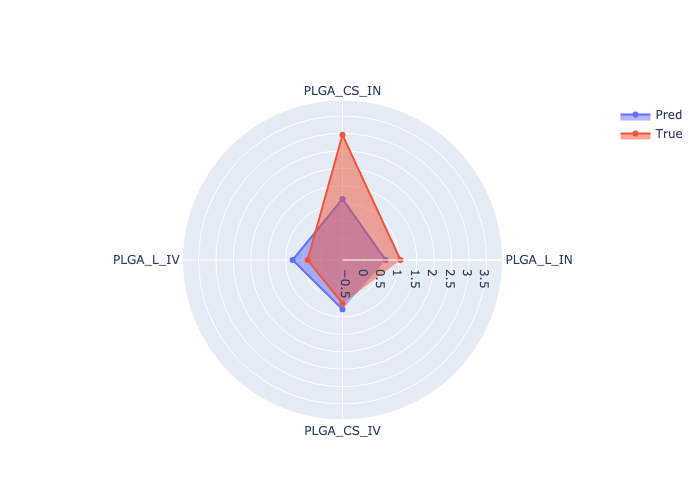

In [9]:
from helpers import radar_graph

radar_graph(true, pred)

### Plotting Some Diagnostic Plots


Heteroscedasticity test 1 (Breusch-Pagan):
 [('Lagrange multiplier statistic', 54.88825658853091), ('p-value', 0.9782223386286405), ('f-value', 0.4864769443619775), ('f p-value', 0.9982197447074426)]

Heteroscedasticity test 2 (Goldfeld-Quandt):
 [('F statistic', nan), ('p-value', nan)]

Linearity test (Harvey-Collier):
 Failed


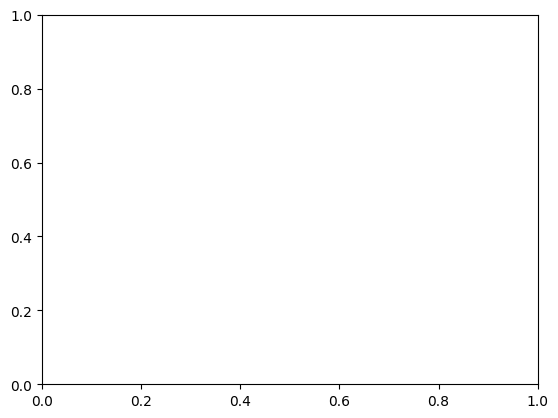

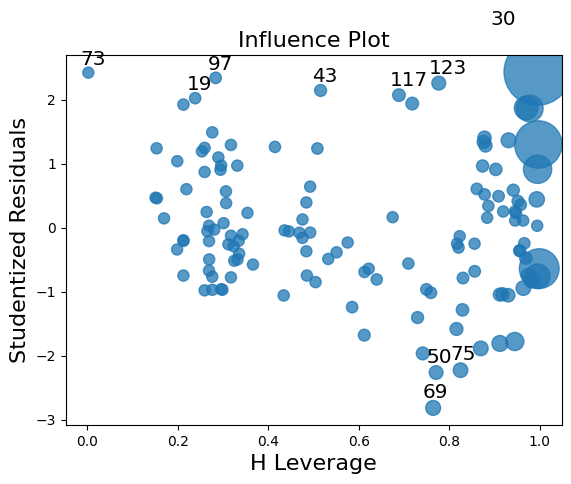

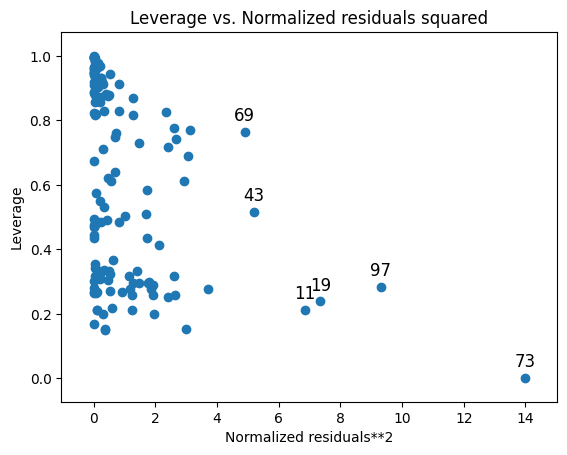

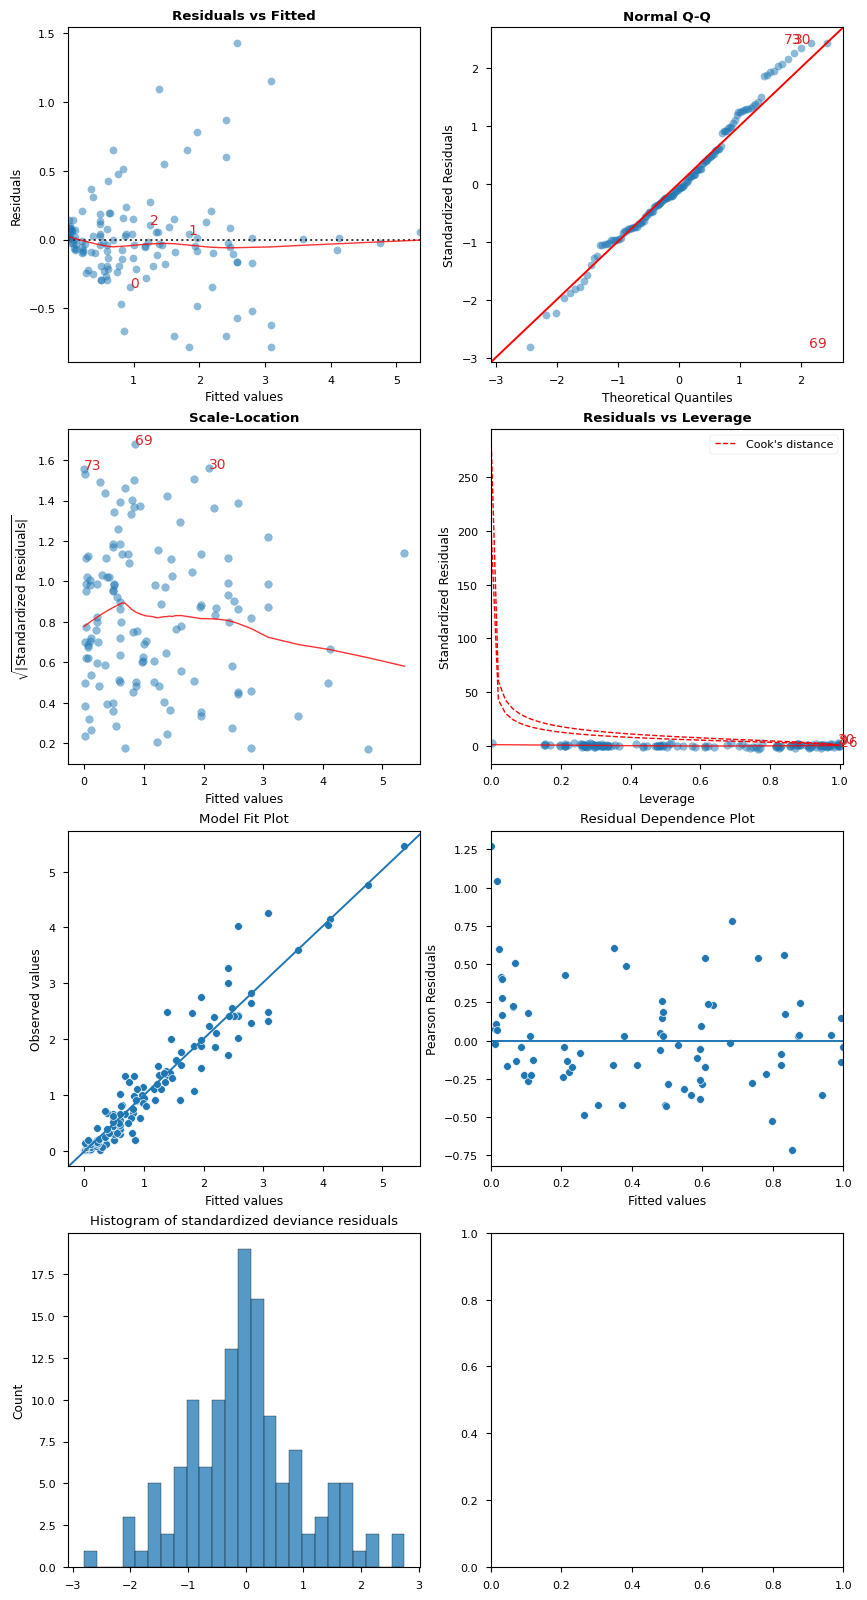

            Features  VIF Factor
78     Release:Route        9.59
76      Zeta:Release       10.17
42  Solubility:Route       14.31
50         Pgp:Route       15.62
75        Size:Route       16.42
..               ...         ...
2               logP     8274.95
37  Solubility:Comp1     8387.00
64       Comp1:Comp2    11608.44
3         Solubility    20036.46
0          Intercept   585553.22

[79 rows x 2 columns]
None


In [10]:
from notebooks.helpers import LinearRegDiagnostic

cls = LinearRegDiagnostic(inter_glm)
fig, ax = cls()

### Fitting the Model With the Gamma Distribution

In [11]:
gamma_inter_glm = smf.glm(
    formula="AUC ~ (Weight + logP + Solubility + Pgp + DrugCarrierRatio + Position + Comp1 + Comp2 + Size + Zeta + Release + Route)**2", data=data, family=sm.families.Gamma()
).fit()
gamma_inter_glm.summary()

/Users/introvertuoso/python3.10_venv/lib/python3.9/site-packages/statsmodels/genmod/generalized_linear_model.py:298: DomainWarning:

The inverse_power link function does not respect the domain of the Gamma family.



<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                    AUC   No. Observations:                  133
Model:                            GLM   Df Residuals:                       54
Model Family:                   Gamma   Df Model:                           78
Link Function:          inverse_power   Scale:                         0.49478
Method:                          IRLS   Log-Likelihood:                -36.332
Date:                Sun, 02 Apr 2023   Deviance:                       33.395
Time:                        00:22:38   Pearson chi2:                     26.7
No. Iterations:                    20   Pseudo R-squ. (CS):             0.9101
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                     269.0261    113.850      2.363      0.018      45.883     492.169
Weight                         -0.2363      0.085     -2.788      0.005      -0.402      -0.070
logP                           -5.4118      9.452     -0.573      0.567     -23.937      13.113
Solubility                      6.7053     88.167      0.076      0.939    -166.099     179.509
Pgp                           -39.0993     13.367     -2.925      0.003     -65.299     -12.900
DrugCarrierRatio              -62.7050     21.051     -2.979      0.003    -103.965     -21.445
Position                       71.7335     34.819      2.060      0.039       3.489     139.978
Comp1                        -204.2381     83.093     -2.458      0.014    -367.097     -41.379
Comp2                        -201.0778     99.164     -2.028      0.043    -395.436      -6.719
Size                            0.2813      0.093      3.022      0.003       0.099       0.464
Zeta                            0.5670      0.504      1.126      0.260      -0.420       1.554
Release                        -5.9399      2.074     -2.864      0.004     -10.005      -1.875
Route                          19.2502     15.175      1.269      0.205     -10.492      48.992
Weight:logP                    -0.0004      0.004     -0.109      0.913      -0.008       0.007
Weight:Solubility              -0.0389      0.049     -0.788      0.431      -0.136       0.058
Weight:Pgp                      0.0092      0.008      1.123      0.262      -0.007       0.025
Weight:DrugCarrierRatio         0.0510      0.026      1.938      0.053      -0.001       0.103
Weight:Position                -0.0371      0.035     -1.051      0.293      -0.106       0.032
Weight:Comp1                    0.1657      0.066      2.492      0.013       0.035       0.296
Weight:Comp2                    0.0509      0.044      1.163      0.245      -0.035       0.137
Weight:Size                 -8.309e-05   5.59e-05     -1.488      0.137      -0.000    2.64e-05
Weight:Zeta                    -0.0002      0.000     -1.033      0.302      -0.001       0.000
Weight:Release                  0.0038      0.002      2.451      0.014       0.001       0.007
Weight:Route                   -0.0290      0.011     -2.533      0.011      -0.051      -0.007
logP:Solubility                 2.8693      1.549      1.853      0.064      -0.166       5.905
logP:Pgp                        3.2834      1.203      2.729      0.006       0.926       5.641
logP:DrugCarrierRatio          -0.5533      1.368     -0.404      0.686      -3.235       2.128
logP:Position                   4.3572      2.387      1.826      0.068      -0.321       9.035
logP:Comp1                      0.0631      4.961      0.013      0.990      -9.661       9.787
logP:Comp2 

In [12]:
gamma_inter_glm.aic

230.66445256087883

In [13]:
np.average(gamma_inter_glm.resid_response**2)

0.12797742752837174

In [14]:
pred = predict(gamma_inter_glm)
pred

0    0.500489
1    1.450224
2    0.914006
3    0.960811
dtype: float64

In [15]:
true = [1.03, 2.96, 0.365, 0.614]

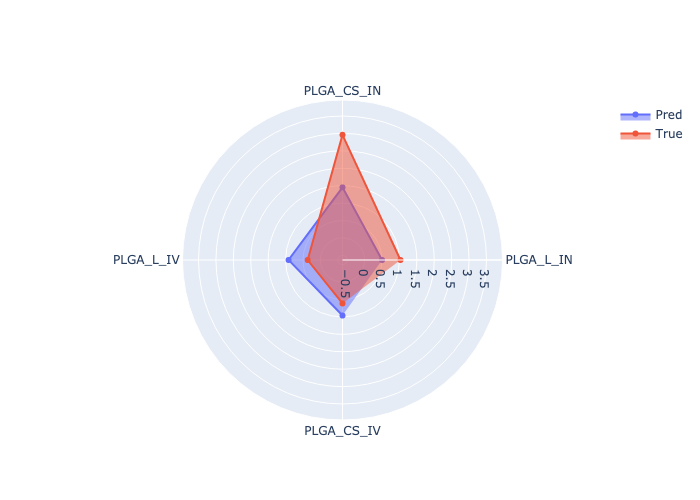

In [16]:
radar_graph(true, pred)


Heteroscedasticity test 1 (Breusch-Pagan):
 [('Lagrange multiplier statistic', 44.762111186023326), ('p-value', 0.999093159538456), ('f-value', 0.3512000832584237), ('f p-value', 0.9999876628825239)]

Heteroscedasticity test 2 (Goldfeld-Quandt):
 [('F statistic', nan), ('p-value', nan)]

Linearity test (Harvey-Collier):
 Failed


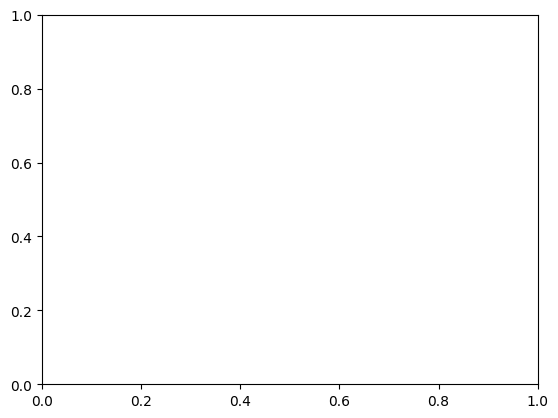

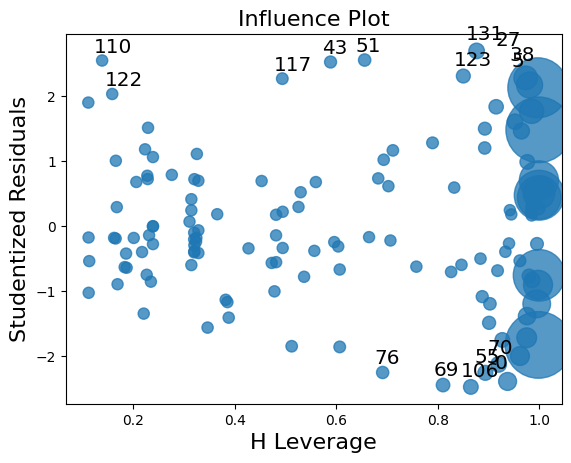

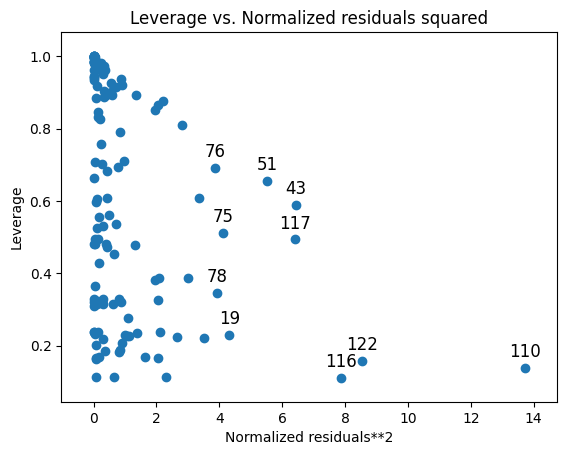

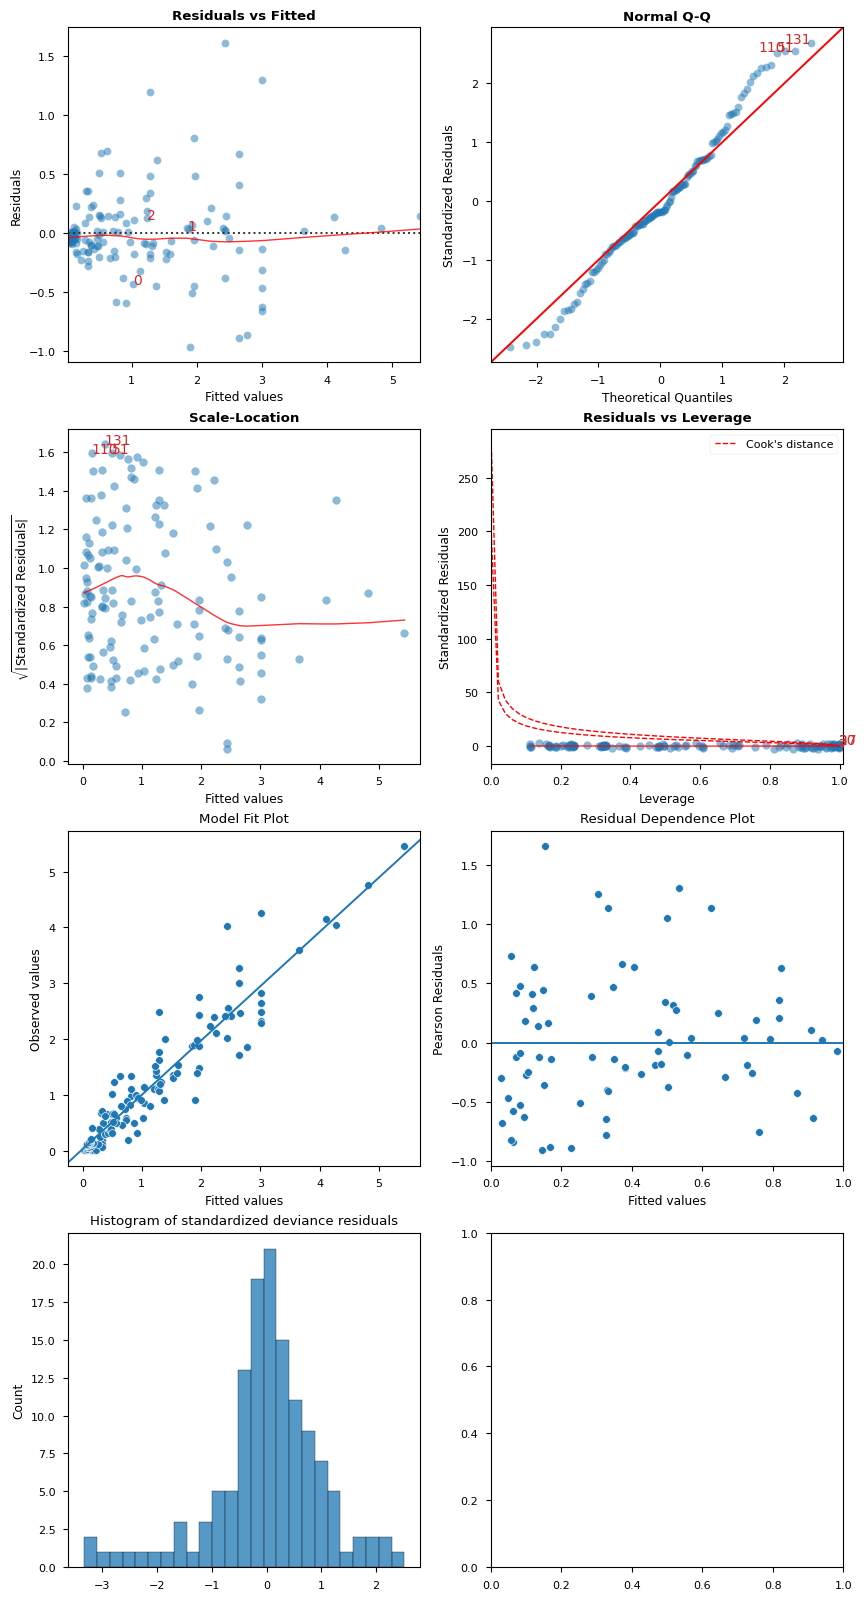

            Features  VIF Factor
78     Release:Route        9.59
76      Zeta:Release       10.17
42  Solubility:Route       14.31
50         Pgp:Route       15.62
75        Size:Route       16.42
..               ...         ...
2               logP     8274.95
37  Solubility:Comp1     8387.00
64       Comp1:Comp2    11608.44
3         Solubility    20036.46
0          Intercept   585553.22

[79 rows x 2 columns]
None


In [17]:
cls = LinearRegDiagnostic(gamma_inter_glm)
fig, ax = cls()

### Fitting the Model With the Gaussian Distribution + Log Link

In [18]:
loglink_inter_glm = smf.glm(
    formula="AUC ~ (Weight + logP + Solubility + Pgp + DrugCarrierRatio + Position + Comp1 + Comp2 + Size + Zeta + Release + Route)**2", data=data, family=sm.families.Gaussian(sm.families.links.Log())
).fit()
loglink_inter_glm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                    AUC   No. Observations:                  133
Model:                            GLM   Df Residuals:                       54
Model Family:                Gaussian   Df Model:                           78
Link Function:                    Log   Scale:                         0.19607
Method:                          IRLS   Log-Likelihood:                -40.870
Date:                Sun, 02 Apr 2023   Deviance:                       10.588
Time:                        00:22:41   Pearson chi2:                     10.6
No. Iterations:                    46   Pseudo R-squ. (CS):             0.9977
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                    -128.3391    110.511     -1.161      0.246    -344.937      88.258
Weight                          0.2106      0.062      3.406      0.001       0.089       0.332
logP                           21.4636      8.642      2.484      0.013       4.526      38.401
Solubility                     62.1716     75.527      0.823      0.410     -85.858     210.201
Pgp                            47.1654     15.169      3.109      0.002      17.434      76.896
DrugCarrierRatio               45.6675     18.357      2.488      0.013       9.688      81.647
Position                      -75.5905     37.167     -2.034      0.042    -148.436      -2.745
Comp1                          80.6146     80.058      1.007      0.314     -76.296     237.525
Comp2                          50.4529    107.329      0.470      0.638    -159.907     260.813
Size                           -0.2886      0.103     -2.790      0.005      -0.491      -0.086
Zeta                           -0.0458      0.534     -0.086      0.932      -1.093       1.001
Release                         5.1474      2.226      2.312      0.021       0.784       9.511
Route                         -30.7022     17.918     -1.714      0.087     -65.820       4.416
Weight:logP                    -0.0003      0.003     -0.086      0.932      -0.006       0.005
Weight:Solubility               0.0406      0.032      1.250      0.211      -0.023       0.104
Weight:Pgp                      0.0002      0.008      0.026      0.979      -0.015       0.015
Weight:DrugCarrierRatio        -0.0551      0.028     -1.992      0.046      -0.109      -0.001
Weight:Position                -0.0085      0.044     -0.194      0.847      -0.095       0.078
Weight:Comp1                   -0.1243      0.043     -2.900      0.004      -0.208      -0.040
Weight:Comp2                   -0.0631      0.035     -1.783      0.075      -0.133       0.006
Weight:Size                  7.101e-05   4.26e-05      1.669      0.095   -1.24e-05       0.000
Weight:Zeta                     0.0002      0.000      1.220      0.223      -0.000       0.001
Weight:Release                 -0.0023      0.001     -2.088      0.037      -0.005      -0.000
Weight:Route                    0.0169      0.013      1.315      0.189      -0.008       0.042
logP:Solubility                -4.8802      2.195     -2.224      0.026      -9.182      -0.578
logP:Pgp                       -3.6704      1.366     -2.688      0.007      -6.347      -0.994
logP:DrugCarrierRatio           1.6813      1.181      1.424      0.154      -0.633       3.996
logP:Position                  -3.5467      2.063     -1.719      0.086      -7.591       0.497
logP:Comp1                     -7.2997      4.368     -1.671      0.095     -15.861       1.261
logP:Comp2 

In [19]:
loglink_inter_glm.aic

239.73999584714858

In [20]:
np.average(loglink_inter_glm.resid_response**2)

0.07960560685625032

In [21]:
pred = predict(loglink_inter_glm)
pred

0    0.953480
1    0.873235
2    0.335643
3    0.576047
dtype: float64

In [22]:
true = [1.03, 2.96, 0.365, 0.614]

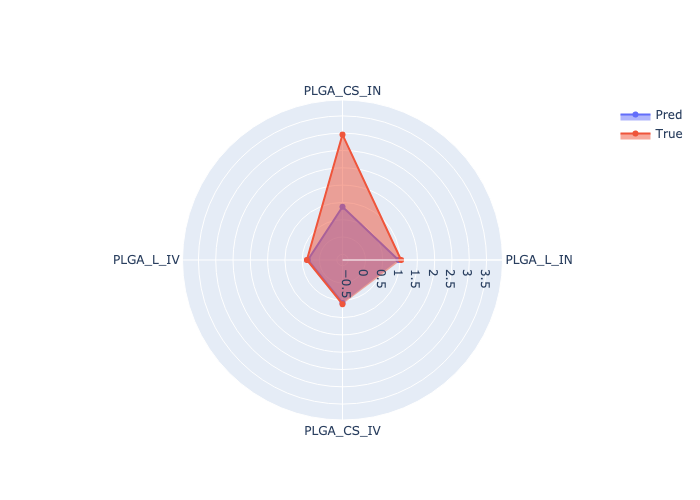

In [23]:
radar_graph(true, pred)

/Users/introvertuoso/python3.10_venv/lib/python3.9/site-packages/statsmodels/genmod/generalized_linear_model.py:1964: RuntimeWarning:

invalid value encountered in sqrt

/Users/introvertuoso/python3.10_venv/lib/python3.9/site-packages/statsmodels/genmod/generalized_linear_model.py:1935: RuntimeWarning:

invalid value encountered in sqrt



Failed to calculate influence

Heteroscedasticity test 1 (Breusch-Pagan):
 [('Lagrange multiplier statistic', 52.85455953542439), ('p-value', 0.9870400092625824), ('f-value', 0.45656518858465495), ('f p-value', 0.9992375595848856)]

Heteroscedasticity test 2 (Goldfeld-Quandt):
 [('F statistic', nan), ('p-value', nan)]

Linearity test (Harvey-Collier):
 Failed
influence unavailable
residual/qqplot/scale-location plot unavailable


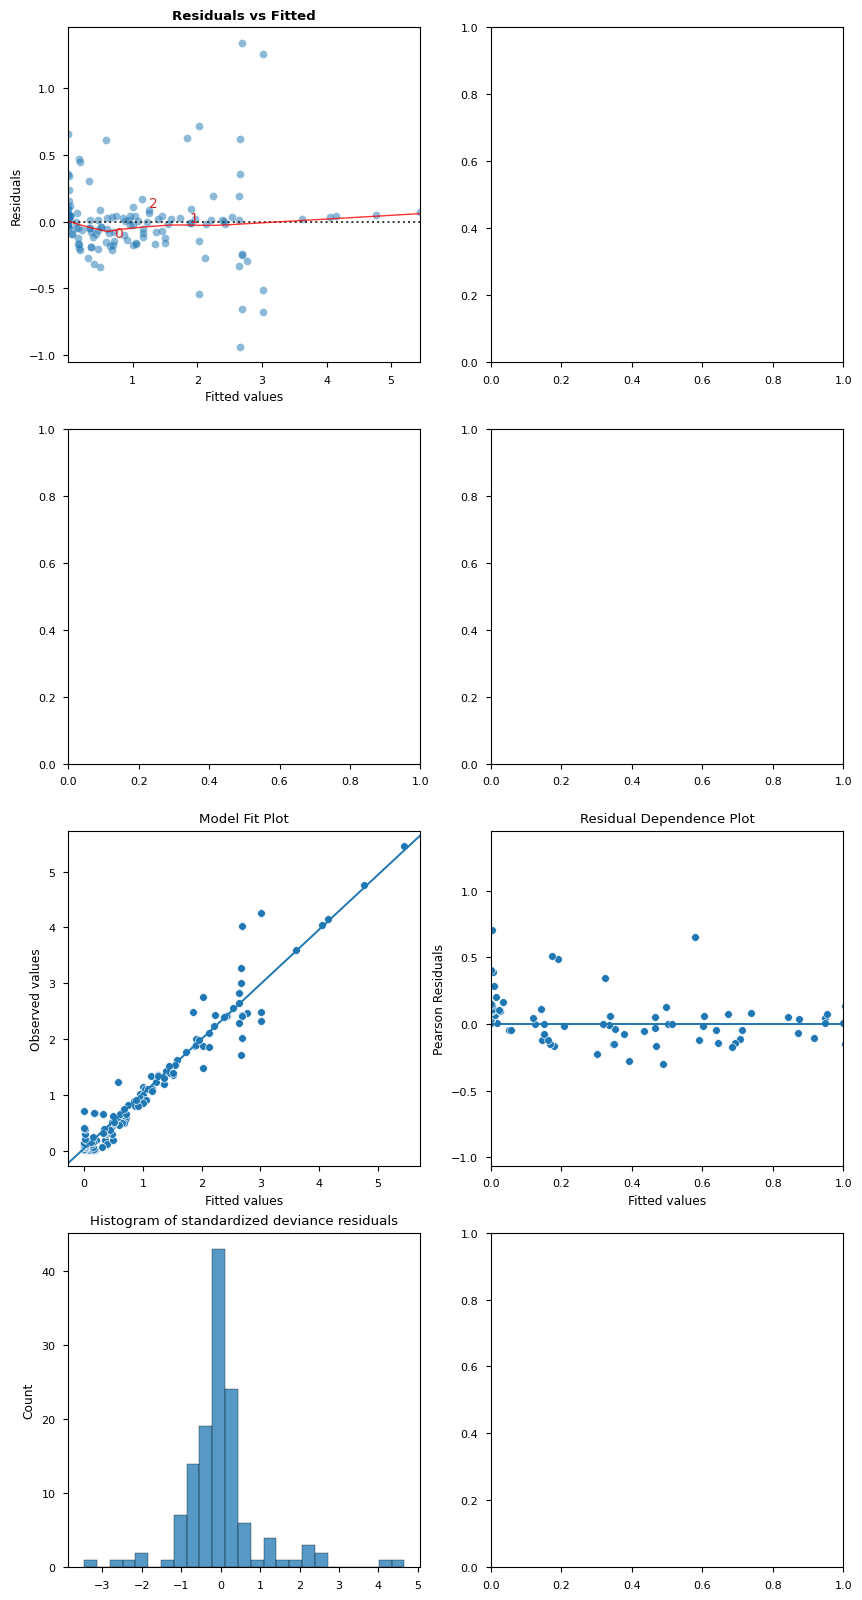

            Features  VIF Factor
78     Release:Route        9.59
76      Zeta:Release       10.17
42  Solubility:Route       14.31
50         Pgp:Route       15.62
75        Size:Route       16.42
..               ...         ...
2               logP     8274.95
37  Solubility:Comp1     8387.00
64       Comp1:Comp2    11608.44
3         Solubility    20036.46
0          Intercept   585553.22

[79 rows x 2 columns]
None


In [24]:
cls = LinearRegDiagnostic(loglink_inter_glm)
fig, ax = cls()

### Refitting the Model With the Neg. Binomial Distribution

In [25]:
negbinom_inter_glm = smf.glm(
    formula="AUC ~ (Weight + logP + Solubility + Pgp + DrugCarrierRatio + Position + Comp1 + Comp2 + Size + Zeta + Release + Route)**2", data=data, family=sm.families.NegativeBinomial()
).fit()
print(negbinom_inter_glm.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                    AUC   No. Observations:                  133
Model:                            GLM   Df Residuals:                       54
Model Family:        NegativeBinomial   Df Model:                           78
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -165.72
Date:                Sun, 02 Apr 2023   Deviance:                       6.7888
Time:                        00:22:42   Pearson chi2:                     6.99
No. Iterations:                    10   Pseudo R-squ. (CS):             0.3738
Covariance Type:            nonrobust                                         
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept         

In [26]:
from notebooks.helpers import import_raw_data
import pandas as pd

raw_data = import_raw_data()

In [27]:
raw_data.Study = raw_data.Study.str.lower().str.strip()
raw_data.API = raw_data.API.str.lower().str.strip()
raw_data.Pgp = raw_data.Pgp.str.lower().str.strip()
raw_data.Position = raw_data.Position.str.lower().str.strip()
raw_data.Comp1 = raw_data.Comp1.str.lower().str.strip()
raw_data.Comp2 = raw_data.Comp2.str.lower().str.strip()
raw_data.CarrierNature = raw_data.CarrierNature.str.lower().str.strip()
raw_data.Preparation = raw_data.Preparation.str.lower().str.strip()
raw_data.Solvent = raw_data.Solvent.str.lower().str.strip()
raw_data.Stabilizer = raw_data.Stabilizer.str.lower().str.strip()
raw_data.Separation = raw_data.Separation.str.lower().str.strip()
raw_data.Ligands = raw_data.Ligands.str.lower().str.strip()
raw_data.NPShape = raw_data.NPShape.str.lower().str.strip()
raw_data.Route = raw_data.Route.str.lower().str.strip()
raw_data.logP = pd.to_numeric(raw_data.logP)
raw_data.pKa = pd.to_numeric(raw_data.pKa)

In [28]:
y = raw_data['AUC']
X = raw_data.drop(['AUC'], axis=1)

In [29]:
X.applymap(lambda x : x.strip() if isinstance(x, str) else x)
X['Pgp'].replace(['no', 'yes'], [0, 1], inplace=True)
X['Position'].replace(['core', 'matrix'], [0, 1], inplace=True)
enc = TargetEncoder(cols=['Comp1', 'Comp2', 'Route'])
X = enc.fit_transform(X, y)

In [30]:
data1 = X.copy()
data1['AUC'] = y

In [39]:
raw_loglink_inter_glm = smf.glm(
    formula="AUC ~ (Weight + logP + Solubility + Pgp + DrugCarrierRatio + Position + Comp1 + Comp2 + Size + Zeta + Release + Route)**2", data=data1, family=sm.families.Gaussian(sm.families.links.Log())
).fit(method="lbfgs")
print(raw_loglink_inter_glm.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                    AUC   No. Observations:                  403
Model:                            GLM   Df Residuals:                      324
Model Family:                Gaussian   Df Model:                           78
Link Function:                    Log   Scale:                          3.9088
Method:                         lbfgs   Log-Likelihood:                -807.02
Date:                Sun, 02 Apr 2023   Deviance:                       1266.4
Time:                        00:22:57   Pearson chi2:                 1.27e+03
No. Iterations:                   100   Pseudo R-squ. (CS):             0.9620
Covariance Type:            nonrobust                                         
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept         

/Users/introvertuoso/python3.10_venv/lib/python3.9/site-packages/statsmodels/base/model.py:592: HessianInversionWarning:

Inverting hessian failed, no bse or cov_params available

/Users/introvertuoso/python3.10_venv/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



In [32]:
raw_loglink_inter_glm.aic

1772.0417655227839

In [33]:
np.average(raw_loglink_inter_glm.resid_response**2)

3.142523312151611

In [34]:
from helpers import predict_lmem

pred = predict_lmem(raw_loglink_inter_glm)
pred

0    3.151000
1    4.165993
2    0.277873
3    2.635181
dtype: float64

In [35]:
true = [1.03, 2.96, 0.365, 0.614]

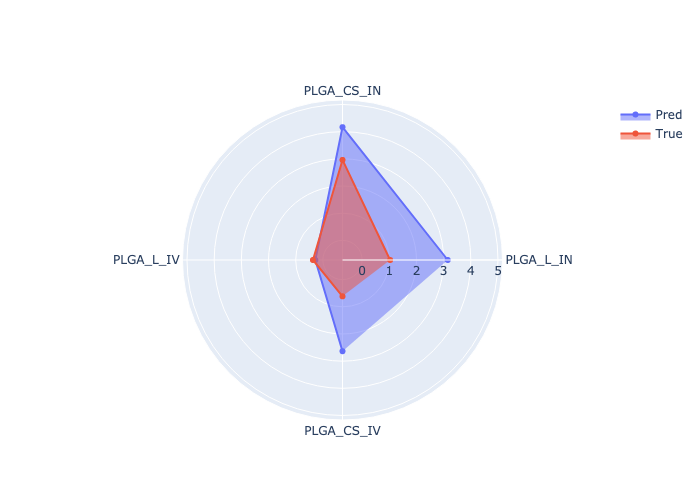

In [36]:
radar_graph(true, pred)

/Users/introvertuoso/python3.10_venv/lib/python3.9/site-packages/statsmodels/genmod/generalized_linear_model.py:1964: RuntimeWarning:

invalid value encountered in sqrt

/Users/introvertuoso/python3.10_venv/lib/python3.9/site-packages/statsmodels/genmod/generalized_linear_model.py:1935: RuntimeWarning:

invalid value encountered in sqrt



Failed to calculate influence

Heteroscedasticity test 1 (Breusch-Pagan):
 [('Lagrange multiplier statistic', 128.38001438878723), ('p-value', 0.0002863987377073404), ('f-value', 1.9418500361970896), ('f p-value', 3.2569879795731045e-05)]

Heteroscedasticity test 2 (Goldfeld-Quandt):
 [('F statistic', 0.831731065175464), ('p-value', 0.8452896427287973)]

Linearity test (Harvey-Collier):
 Failed
influence unavailable
residual/qqplot/scale-location plot unavailable


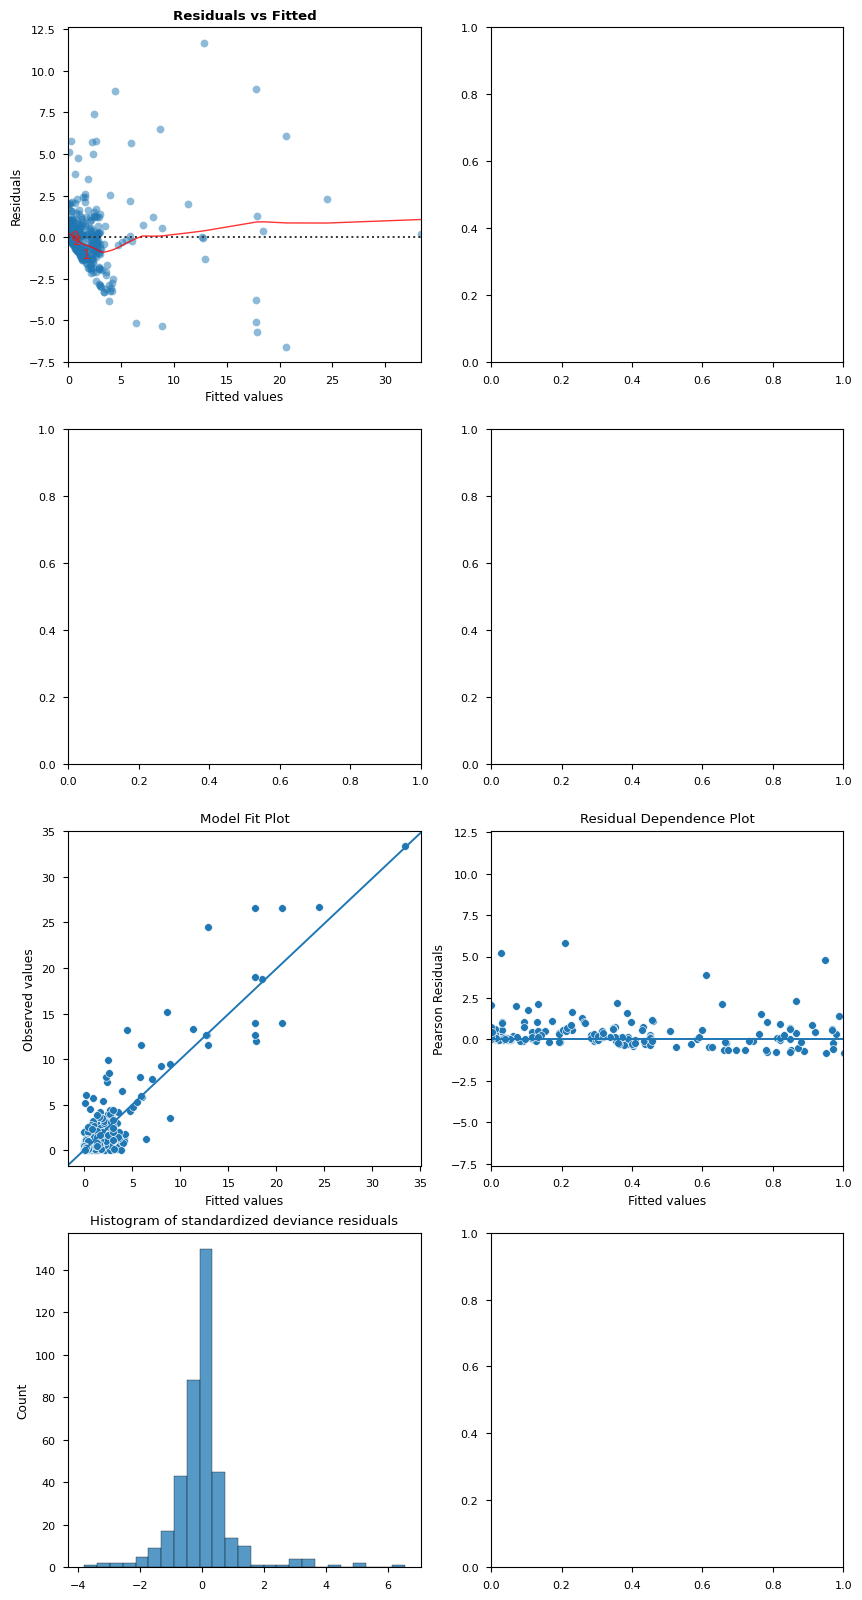

                 Features  VIF Factor
55  DrugCarrierRatio:Zeta        2.80
61          Position:Zeta        2.84
31              logP:Zeta        3.86
48               Pgp:Zeta        4.41
74           Size:Release        4.71
..                    ...         ...
1                  Weight    16822.95
71          Comp2:Release    23977.00
11                Release    34939.37
38       Solubility:Comp2    43911.59
3              Solubility   105333.18

[79 rows x 2 columns]
None


In [37]:
cls = LinearRegDiagnostic(raw_loglink_inter_glm)
fig, ax = cls()

In [40]:
raw_gamma_inter_glm = smf.glm(
    formula="AUC ~ (Weight + logP + Solubility + Pgp + DrugCarrierRatio + Position + Comp1 + Comp2 + Size + Zeta + Release + Route)**2", data=data1, family=sm.families.Gamma()
).fit(method="lbfgs")
print(raw_gamma_inter_glm.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                    AUC   No. Observations:                  403
Model:                            GLM   Df Residuals:                      324
Model Family:                   Gamma   Df Model:                           78
Link Function:          inverse_power   Scale:                          1.3543
Method:                         lbfgs   Log-Likelihood:                -682.00
Date:                Sun, 02 Apr 2023   Deviance:                       954.55
Time:                        00:27:02   Pearson chi2:                     439.
No. Iterations:                     0   Pseudo R-squ. (CS):            -0.1490
Covariance Type:            nonrobust                                         
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept         

/Users/introvertuoso/python3.10_venv/lib/python3.9/site-packages/statsmodels/genmod/generalized_linear_model.py:298: DomainWarning:

The inverse_power link function does not respect the domain of the Gamma family.

/Users/introvertuoso/python3.10_venv/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



In [41]:
raw_gamma_inter_glm.aic
np.average(raw_gamma_inter_glm.resid_response**2)

44.50357264964015

In [42]:
pred = predict_lmem(raw_gamma_inter_glm)
pred

0    2.437546
1   -4.227872
2    0.631966
3    2.743897
dtype: float64

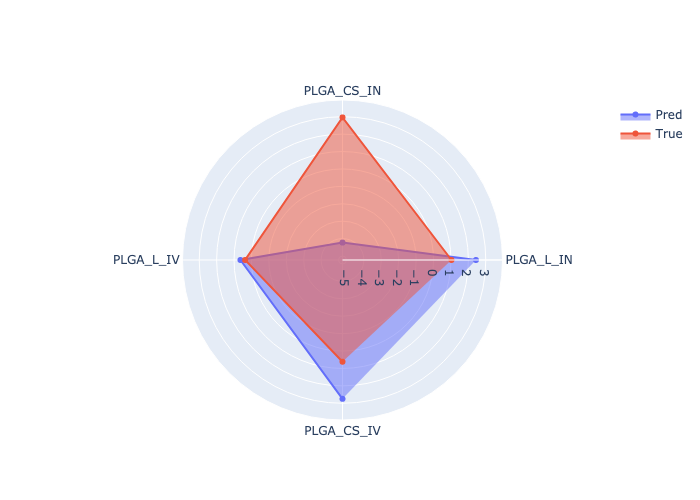

In [43]:
true = [1.03, 2.96, 0.365, 0.614]
radar_graph(true, pred)


Heteroscedasticity test 1 (Breusch-Pagan):
 [('Lagrange multiplier statistic', 45.79373724046563), ('p-value', 0.9986481192837215), ('f-value', 0.5325218484050004), ('f p-value', 0.9994506987345144)]

Heteroscedasticity test 2 (Goldfeld-Quandt):
 [('F statistic', 0.0823134957146545), ('p-value', 0.9999999999999999)]

Linearity test (Harvey-Collier):
 Failed


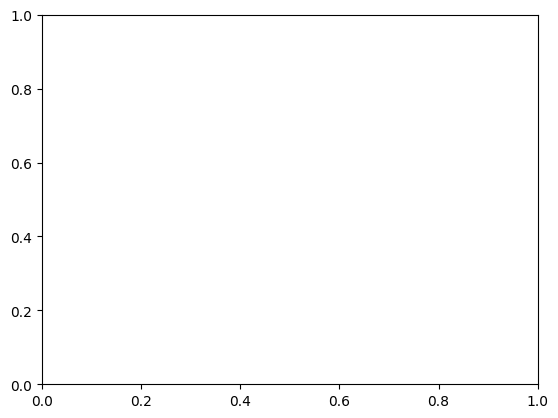

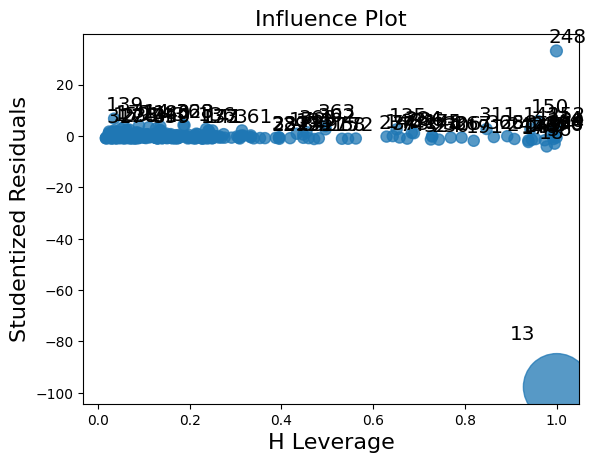

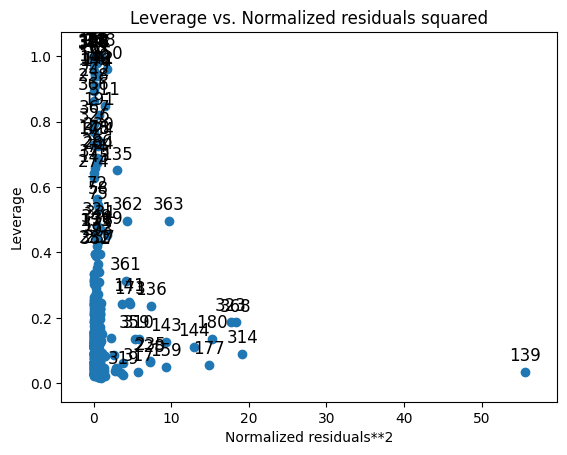

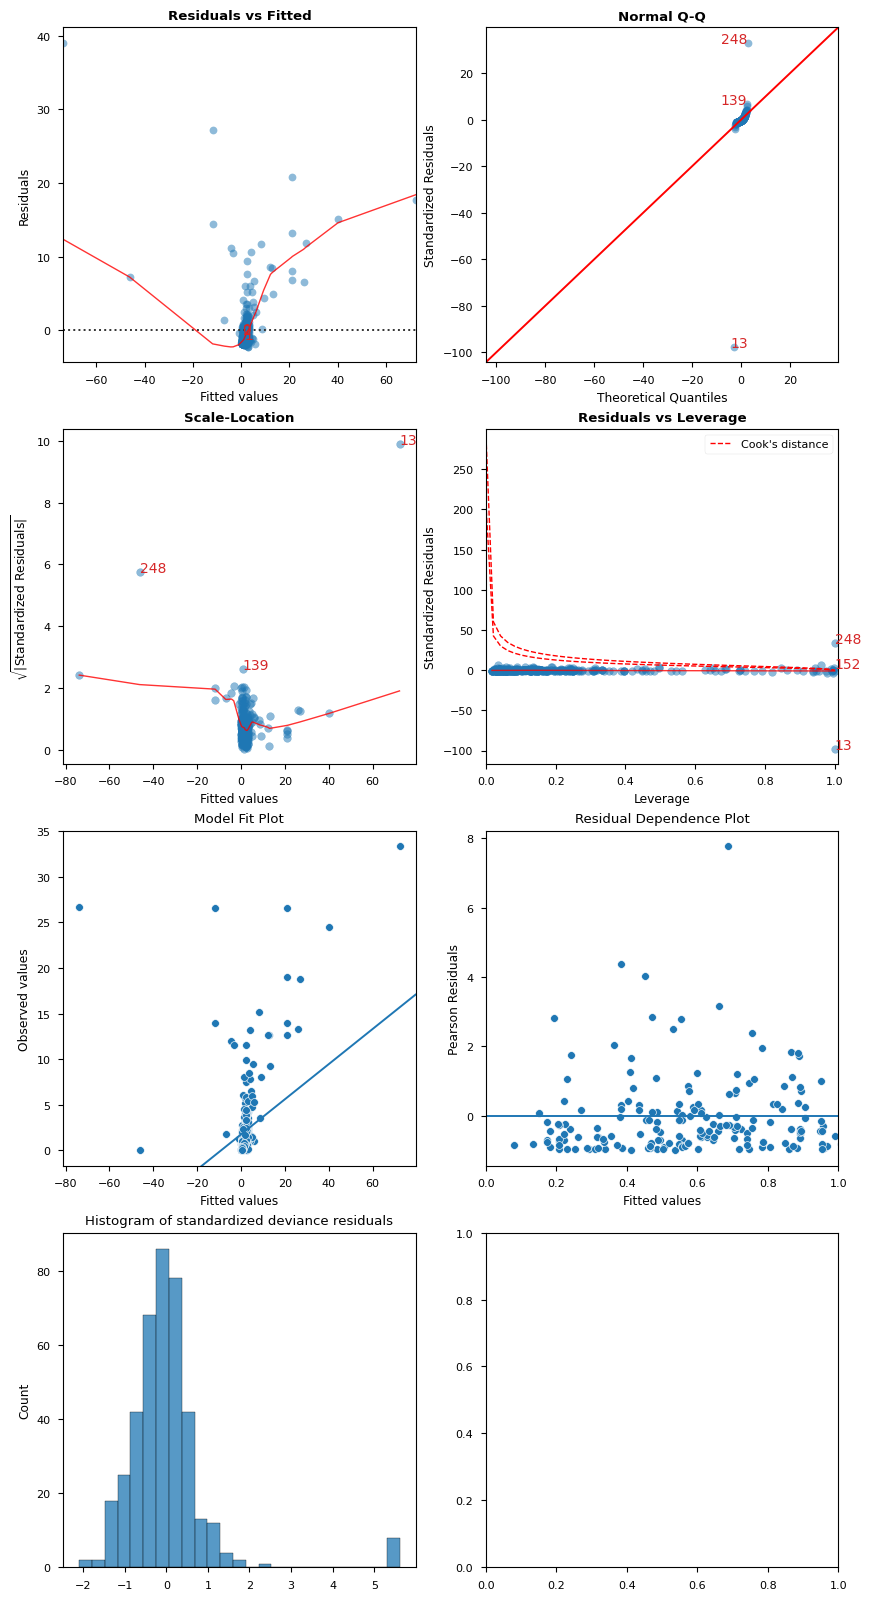

                 Features  VIF Factor
55  DrugCarrierRatio:Zeta        2.80
61          Position:Zeta        2.84
31              logP:Zeta        3.86
48               Pgp:Zeta        4.41
74           Size:Release        4.71
..                    ...         ...
1                  Weight    16822.95
71          Comp2:Release    23977.00
11                Release    34939.37
38       Solubility:Comp2    43911.59
3              Solubility   105333.18

[79 rows x 2 columns]
None


In [44]:
cls = LinearRegDiagnostic(raw_gamma_inter_glm)
fig, ax = cls()